In [1]:
import pandas as pd
import mne
import sys
import platform
import os
import scipy.io
import numpy as np

if platform.system()=='Darwin':
    os.chdir('/Volumes/BBC/BBC/WP1/data/EEG/tsk/')
    sys.path.append('/Users/leupinv/BBC/WP1/data/Code/python/BBC')
    #if this doesn't work pound line right above this, restart the kernel, rerun the cell. 
    #Then uncomment the same line and rerun

else:
    #os.chdir('Z:/BBC/WP1/data/EEG/tsk')
    sys.path.append('C:/Users/Vivi/switchdrive/BBC/WP1/data/Code/python/BBC')
    os.chdir('Z:/BBC/WP1/data/EEG/tsk')
from base.files_in_out import getListOfFiles,GetFiles

/opt/anaconda3/envs/mne_13/lib/python3.9/site-packages/mne/datasets/eegbci/eegbci.py:8: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


In [2]:
# check vep subject
epo_vep=mne.read_epochs('/Volumes/BBC/BBC/WP1/data/EEG/tsk/preproc/g11/g11_epochs/g11_final/g11_n_tsk_cfa_vep_clean_epo.fif')

Reading /Volumes/BBC/BBC/WP1/data/EEG/tsk/preproc/g11/g11_epochs/g11_final/g11_n_tsk_cfa_vep_clean_epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Adding metadata with 40 columns
907 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/opt/anaconda3/envs/mne_13/lib/python3.9/site-packages/mne/io/open.py:160: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dirpos = int(tag.data)
/opt/anaconda3/envs/mne_13/lib/python3.9/site-packages/mne/io/tag.py:299: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  version=int(np.frombuffer(fid.read(4), dtype=">i4")),
/opt/anaconda3/envs/mne_13/lib/python3.9/site-packages/mne/io/tag.py:301: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  secs=int(np.frombuffer(fid.read

Need more than one channel to make topography for eeg. Disabling interactivity.


/var/folders/h0/1wth00ys3jbdvzr6zdkyr5580000gn/T/ipykernel_65626/568287729.py:2: RuntimeWarning: tmin is not in Evoked time interval. tmin is set to evoked.tmin (-0.199219 sec)
  epo_vep[('vep/normal/correct')].average().crop(-0.3,0.6).plot(picks='A15')


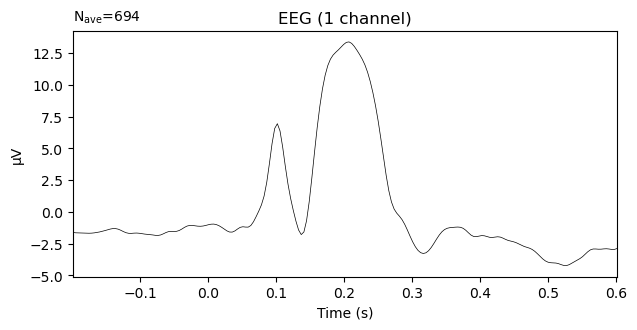

In [15]:
%matplotlib qt
epo_vep[('vep/normal/correct')].average().crop(-0.3,0.6).plot(picks='A15')

Reading /Volumes/BBC/BBC/WP1/data/EEG/tsk/preproc/g11/g11_epochs/g11_final/g11_n_tsk_cfa_hep_clean_epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available


/opt/anaconda3/envs/mne_13/lib/python3.9/site-packages/mne/io/open.py:160: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dirpos = int(tag.data)
/opt/anaconda3/envs/mne_13/lib/python3.9/site-packages/mne/io/tag.py:299: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  version=int(np.frombuffer(fid.read(4), dtype=">i4")),
/opt/anaconda3/envs/mne_13/lib/python3.9/site-packages/mne/io/tag.py:301: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  secs=int(np.frombuffer(fid.read

0 bad epochs dropped
Adding metadata with 40 columns
1741 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Need more than one channel to make topography for eeg. Disabling interactivity.


/var/folders/h0/1wth00ys3jbdvzr6zdkyr5580000gn/T/ipykernel_65626/3302054487.py:2: RuntimeWarning: tmin is not in Evoked time interval. tmin is set to evoked.tmin (-0.199219 sec)
  epo_hep[('hep/RRCA')].average().crop(-0.3,0.6).plot(picks='A15')


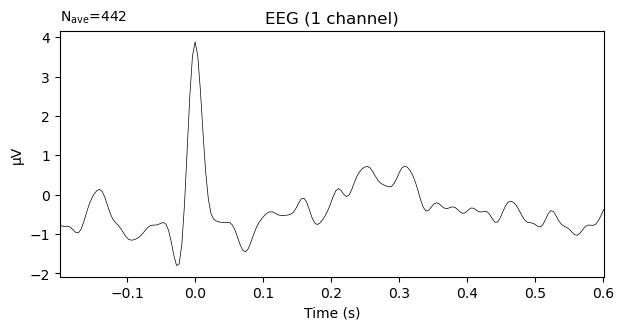

In [14]:
epo_hep=mne.read_epochs('/Volumes/BBC/BBC/WP1/data/EEG/tsk/preproc/g11/g11_epochs/g11_final/g11_n_tsk_cfa_hep_clean_epo.fif')
epo_hep[('hep/RRCA')].average().crop(-0.3,0.6).plot(picks='A15')

In [6]:
# Load your MNE Raw object (example)
raw = mne.io.read_raw_fif("/Volumes/BBC/BBC/WP1/data/EEG/tsk/raw/g11/g11_n_tsk_ds_eeg-raw.fif", preload=True)
# Extract the data (channels × time)
data = raw.get_data()  # Shape: (n_channels, n_times)
# Extract channel names and sampling rate
channel_names = raw.ch_names
sfreq = raw.info["sfreq"]

Opening raw data file /Volumes/BBC/BBC/WP1/data/EEG/tsk/raw/g11/g11_n_tsk_ds_eeg-raw.fif...


/opt/anaconda3/envs/mne_13/lib/python3.9/site-packages/mne/io/open.py:160: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dirpos = int(tag.data)


    Read a total of 1 projection items:
        Average EEG reference (1 x 128)  idle
    Range : 0 ... 914687 =      0.000 ...  3572.996 secs
Ready.
Reading 0 ... 914687  =      0.000 ...  3572.996 secs...


/opt/anaconda3/envs/mne_13/lib/python3.9/site-packages/mne/io/tag.py:299: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  version=int(np.frombuffer(fid.read(4), dtype=">i4")),
/opt/anaconda3/envs/mne_13/lib/python3.9/site-packages/mne/io/tag.py:301: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  secs=int(np.frombuffer(fid.read(4), dtype=">i4")),
/opt/anaconda3/envs/mne_13/lib/python3.9/site-packages/mne/io/tag.py:302: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  usec

In [8]:
raw.drop_channels(['EXG1','Erg1','Status'])
annotations=raw.annotations
# Convert onsets from seconds to sample
sample_indices = np.round(annotations.onset * sfreq).astype(int)

ValueError: Channel(s) EXG1, Erg1, Status not found, nothing dropped.

In [5]:
annotations.to_data_frame()

,onset,duration,description
0,2021-05-08 15:46:12.666992,0.0,hep/normal/correct/unaware/R2/inh/RRCU
1,2021-05-08 15:46:12.916992,0.0,hep/normal/correct/unaware/T/inh/no_val
2,2021-05-08 15:46:13.292969,0.0,vep/normal/correct/unaware/dia/exh
3,2021-05-08 15:46:13.909180,0.0,xns/normal/correct/unaware/dia/exh
4,2021-05-08 15:46:15.694336,0.0,hep/normal/correct/aware/R2/exh/RRCA
...,...,...,...
3922,2021-05-08 16:45:34.652344,0.0,xns/normal/correct/aware/dia/inh
3923,2021-05-08 16:45:36.008789,0.0,hep/easy/correct/aware/T2/inh/no_val
3924,2021-05-08 16:45:36.492188,0.0,hep/easy/correct/aware/R/exh/RRCA
3925,2021-05-08 16:45:36.727539,0.0,vep/easy/correct/aware/sys/exh


In [13]:
# Parse the descriptions and filter/remap events
filtered_onsets = []
filtered_durations = []
filtered_descriptions = []

# Create event table
# Parse the descriptions and create the event table
event_data = {
    "time": [],  # Onset in seconds
    "event": [],  # Simplified event type ("hep" or "vep")
    "awareness": [],  # Awareness state ("aware" or "unaware")
    "duration": [],  # Duration in seconds
    "card_phase": [], # cardiac phase
    "rsp_phase":[],# rsp phase
}


for i, desc in enumerate(annotations.description):
    # Split the description into tags
    tags = desc.split("/")
    if 'BAD' in tags[0]:
        continue

    # Check if the event matches the stimulus criteria
    # Must contain "vep", "normal", "correct"
    if (
            "normal" in tags[1].lower() and  # Check for "normal" in the second tag
            "correct" in tags[2].lower()  # Check for "correct" in the third tag
    ):
        # Check for hep events with RRCA or RRCU
        if "hep" in tags[0].lower():
            if tags[-1] in ["RRCA", "RRCU"]:
                condition_name = "hep"  # Collapse RRCA and RRCU into "hep"
                awareness = "aware" if tags[-1] == "RRCA" else "unaware"
                card_phase='dia' if tags[-3]=='R2'else 'sys'
                rsp_phase='inh'if tags[-2]=='inh' else 'exh'
            else:
                continue  # Skip if not RRCA or RRCU
            filtered_onsets.append(annotations.onset[i])
            filtered_durations.append(annotations.duration[i])
            filtered_descriptions.append(condition_name)
            event_data["time"].append(annotations.onset[i])
            event_data["event"].append(condition_name)
            event_data["awareness"].append(awareness)
            event_data["duration"].append(annotations.duration[i])
            event_data["card_phase"].append(card_phase)
            event_data["rsp_phase"].append(rsp_phase)

        # Check for vep events with aware or unaware
        elif "vep" in tags[0].lower():
            if "aware" in tags[3].lower() or "unaware" in tags[3].lower():
                condition_name = "vep"  # Collapse aware and unaware into "vep"
                awareness = "unaware" if "unaware" in tags[3].lower() else "aware"
                card_phase='dia' if tags[-2]=='dia'else 'sys'
                rsp_phase='inh'if tags[-1]=='inh' else 'exh'
            else:
                continue  # Skip if not aware or unaware
            filtered_onsets.append(annotations.onset[i])
            filtered_durations.append(annotations.duration[i])
            filtered_descriptions.append(condition_name)
            event_data["time"].append(annotations.onset[i])
            event_data["event"].append(condition_name)
            event_data["awareness"].append(awareness)
            event_data["duration"].append(annotations.duration[i])
            event_data["card_phase"].append(card_phase)
            event_data["rsp_phase"].append(rsp_phase)


In [14]:
# Create a DataFrame from the event data
event_table = pd.DataFrame(event_data)
# Sort the event table by time (ensures chronological order)
event_table = event_table.sort_values(by="time").reset_index(drop=True)

# Save the event table to a CSV file
event_table.to_csv("ana/deconvolution/test/event_table_g11.csv", index=False)


In [9]:
# Create a new Annotations object with the simplified conditions
new_annotations = mne.Annotations(
    onset=filtered_onsets,  # Onsets in seconds
    duration=filtered_durations,  # Durations in seconds
    description=filtered_descriptions  # Simplified descriptions ("hep" or "vep")
)

# Set the new annotations in the Raw object, replacing the old ones
raw.set_annotations(new_annotations)

<Raw | g11_n_tsk_ds_eeg-raw.fif, 128 x 914688 (3573.0 s), ~893.4 MB, data loaded>

In [8]:

# Save the Raw object to a .set file for EEGLAB
mne.export.export_raw("ana/deconvolution/test/eeg_data_g11.set",raw=raw,overwrite=True)

Overwriting existing file.


/var/folders/h0/1wth00ys3jbdvzr6zdkyr5580000gn/T/ipykernel_65626/823600430.py:2: RuntimeWarning: Raw instance has unapplied projectors. Consider applying them before exporting with raw.apply_proj().
  mne.export.export_raw("ana/deconvolution/test/eeg_data_g11.set",raw=raw,overwrite=True)


# Test for julia export

In [22]:
# Map condition names to numeric IDs
unique_conditions = sorted(set(condition_names))  # Should be ["hep", "vep"]
condition_to_id = {cond: idx + 1 for idx, cond in enumerate(unique_conditions)}  # Start IDs at 1
event_ids = np.array([condition_to_id[cond] for cond in filtered_conditions])


# Create the events array: [sample, prev_id, event_id]
events = np.column_stack([
    filtered_samples,  # Sample indices
    np.zeros(len(filtered_samples), dtype=int),  # prev_id (set to 0)
    event_ids  # Event IDs
])

In [23]:

# Create a dictionary for the .mat file
mat_dict = {
    "eeg_data": data,  # EEG data (channels × time)
    "events": events,  # Events array (n_events × 3: [sample, prev_id, event_id])
    "channel_names": channel_names,  # List of channel names
    "sfreq": sfreq,  # Sampling rate
    "event_descriptions": np.array(filtered_conditions),  # Remapped condition names
    "condition_to_id": np.array(list(condition_to_id.items()))  # Mapping of conditions to IDs
}

In [28]:
os.getcwd()

'/Volumes/BBC/BBC/WP1/data/EEG/tsk'

In [29]:
# Save to a .mat file
scipy.io.savemat("ana/deconvolution/test/eeg_data_g11.mat", mat_dict)

In [ ]:



# Parse the descriptions and filter/remap events
filtered_samples = []
filtered_conditions = []
condition_names = []

for i, desc in enumerate(annot_dict["description"]):
    # Split the description into tags
    tags = desc.split("/")

    # Check if the event matches the stimulus criteria
    # Must contain "rep", "normal", "correct"
    if (
            "rep" in tags[1].lower() and  # Check for "rep" in the second tag
            "normal" in tags[1].lower() and  # Check for "normal" in the second tag
            "correct" in tags[2].lower()  # Check for "correct" in the third tag
    ):
        # Check for hep events with RRCA or RRCU
        if "hep" in tags[0].lower():
            if tags[-1] in ["RRCA", "RRCU"]:
                condition_name = "hep"  # Collapse RRCA and RRCU into "hep"
            else:
                continue  # Skip if not RRCA or RRCU
            filtered_samples.append(sample_indices[i])
            condition_names.append(condition_name)
            filtered_conditions.append(condition_name)

        # Check for vep events with aware or unaware
        elif "vep" in tags[0].lower():
            if "aware" in tags[3].lower() or "unaware" in tags[3].lower():
                condition_name = "vep"  # Collapse aware and unaware into "vep"
            else:
                continue  # Skip if not aware or unaware
            filtered_samples.append(sample_indices[i])
            condition_names.append(condition_name)
            filtered_conditions.append(condition_name)

# Map condition names to numeric IDs
unique_conditions = sorted(set(condition_names))  # Should be ["hep", "vep"]
condition_to_id = {cond: idx + 1 for idx, cond in enumerate(unique_conditions)}  # Start IDs at 1
event_ids = np.array([condition_to_id[cond] for cond in filtered_conditions])

# Create the events array: [sample, prev_id, event_id]
events = np.column_stack([
    filtered_samples,  # Sample indices
    np.zeros(len(filtered_samples), dtype=int),  # prev_id (set to 0)
    event_ids  # Event IDs
])

# Create a dictionary for the .mat file
mat_dict = {
    "eeg_data": data,  # EEG data (channels × time)
    "events": events,  # Events array (n_events × 3: [sample, prev_id, event_id])
    "channel_names": channel_names,  # List of channel names
    "sfreq": sfreq,  # Sampling rate
    "event_descriptions": np.array(filtered_conditions),  # Remapped condition names
    "condition_to_id": np.array(list(condition_to_id.items()))  # Mapping of conditions to IDs
}

# Save to a .mat file
scipy.io.savemat("eeg_data_filtered.mat", mat_dict)

print("Filtered data exported to eeg_data_filtered.mat")
print("Unique conditions:", unique_conditions)

In [8]:
raw.plot()

Matplotlib is building the font cache; this may take a moment.


Using qt as 2D backend.
Opening raw-browser...
Using pyopengl with version 3.1.7


In [ ]:






# Export the data as a NumPy array
np.save("eeg_data.npy", data)

# Export event information (if available)
events = mne.find_events(raw)  # Shape: (n_events, 3) - [sample, prev_id, event_id]
events_df = pd.DataFrame(events, columns=["sample", "prev_id", "event_id"])
events_df.to_csv("events.csv", index=False)

# Optionally save channel info
info_df = pd.DataFrame({"channel": channel_names})
info_df.to_csv("channel_info.csv", index=False)